In [12]:
import pandas as pd




sentiment_df = pd.read_csv("intermediate/sentiment_df.csv")
sentiment_df


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2631,2632,2633,2634,2635,2636,2637,2638,2639,2640
0,8mm_WELLES,-0.388458,-0.179908,-0.690420,-0.410216,-0.127808,-0.200929,-0.253010,-0.266261,-0.266261,...,-1.506959,-1.275290,-1.275290,0.323569,0.462834,0.462834,0.013667,-0.148670,-0.148670,0.363089
1,ALongKissGoodnight_SAMANTHA,-0.557789,-0.539567,-0.412999,-0.561661,-0.602001,-0.467133,-0.465442,-0.483987,-0.554432,...,2.591417,2.576702,2.482802,2.443357,2.399951,2.409383,2.438305,2.519179,2.540471,2.540471
2,ALongKissGoodnight_HENESSEY,0.058272,0.257565,0.141700,0.226722,0.104161,0.014863,0.129360,0.300387,0.002395,...,1.148201,1.153310,1.211955,1.374912,1.320231,1.214070,1.187929,1.284584,1.353301,1.353301
3,ALongKissGoodnight_CHARLY,0.124827,0.015560,-0.001868,0.086237,0.115145,0.106418,-0.149219,0.386767,-0.037472,...,-0.334620,-0.469184,-0.469184,-2.072929,-2.308375,-2.114205,-2.021867,-2.218409,-2.218409,0.127872
4,Aliens_RIPLEY,-1.461576,-1.801330,-1.386296,-1.519984,-1.357357,-1.505535,-1.348146,-1.604556,-1.660461,...,-0.338466,-0.338466,0.251021,0.271171,0.338565,0.475667,0.531814,0.451536,0.451536,0.205001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,waroftheworlds_ROBBIE,-0.770871,-0.810068,-0.899777,-0.741681,-0.649694,-0.813305,-0.834457,-0.559125,-0.722274,...,1.639131,1.286264,1.294088,1.231002,1.129449,1.233187,1.005054,1.079391,1.079391,0.989769
197,wildwildwest_WEST,-0.968065,-1.239774,-1.155533,-1.122617,-1.171754,-1.359352,-1.473830,-1.051772,-1.052521,...,0.469463,0.469463,0.485152,0.694119,0.704479,0.704479,0.117674,0.179810,0.168193,0.168193
198,wildwildwest_GORDON,0.335287,0.454348,0.562123,0.442778,0.328475,0.635000,0.747620,0.350241,0.521803,...,-0.063969,-0.029764,0.019378,0.061726,0.072817,0.107673,0.111003,-0.219229,-0.219229,0.798632
199,wildwildwest_LOVELESS,-0.219370,-0.219493,-0.267367,-0.273129,-0.132806,-0.156655,-0.326479,-0.147795,-0.290053,...,-1.447293,-1.458213,-1.377394,-1.395560,-1.475878,-1.590031,-1.460607,-1.491530,-1.603573,-1.603573


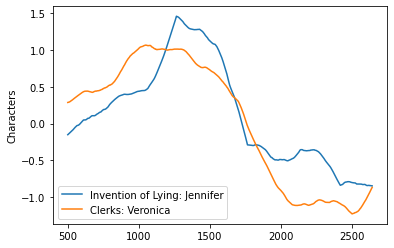

In [150]:
import numpy as np
import matplotlib.pyplot as plt

def transform(things):
    ret = []
    for i in range(len(things) - 1) :
        ret.append(things[i + 1] - things[i])
    return ret

def character_plot(character_name):
    po = sentiment_df.loc[sentiment_df["Unnamed: 0"] == character_name]
    y_values = np.asarray(po)
    y_values = y_values[0][1:]
    y_values = transform(y_values)
    y_values = pd.Series(y_values)
    y_values = y_values.rolling(500).mean()
    return y_values



low_score = 1999
for i in range(100000):
    df = sentiment_df.sample(2)
    characters = np.asarray(df["Unnamed: 0"])

    po_values = character_plot(characters[0])
    luke_values = character_plot(characters[1])

    dist = np.linalg.norm(po_values[500:] - luke_values[500:])

    if (dist < low_score):
        print("HIGHEST")
        print(low_score)
        print(characters[0])
        print(characters[1])
        low_score = dist


x_values = []
for i in range(0, 2640):
    x_values.append(i)


plt.plot(x_values, po_values, x_values, luke_values)
plt.ylabel('Characters')
plt.legend(["Observe and Report: Ronnie", "Bounty Hunter: Milo"])
plt.show()



